# Paper Graphs

Graphs for paper

In [1]:
# importing code
import os
import math
import importlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy import signal
from windrose import WindroseAxes

import data_pipeline as dp
import graph_code as gc
# from wp_pipeline import *

out_p = "plots/paper/"

/home/emcewen/.local/lib/python3.6/site-packages/windrose/windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
/home/emcewen/.local/lib/python3.6/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/home/emcewen/.local/lib/python3.6/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/home/emcewen/.local/lib/python3.6/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3

In [2]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.debug("test")
logging.info("inf: test")

INFO:root:inf: test


## 3.1 Wind data plots

In [ ]:
# Windplot for CFHT data

df_main = pd.read_csv("csv/main_cfht.csv")
#df_main["DATETIME"] = pd.to_datetime(df_main["DATETIME"])

ws = df_main["cft_avgwindspeed"].tolist()
wd = df_main["cft_avgwinddir"].tolist()

ax = WindroseAxes.from_ax()
ax.contourf(wd, ws, bins=np.arange(0, 70, 5), cmap=cm.viridis)
ax.set_legend()
ax.set_title("CFHT Wind Velocities")
plt.savefig(out_p +'windplot_main_cfht_paper.png')

In [ ]:
# Windplot for 250 data

df_main = pd.read_csv("csv/main_cfht_250.csv")
df_main["DATETIME"] = pd.to_datetime(df_main["DATETIME"])
df_wind = df_main[["250_wspd", "250_wdir"]].dropna()
ws = df_wind["250_wspd"].tolist()
wd = df_wind["250_wdir"].tolist()

ax = WindroseAxes.from_ax()
ax.contourf(wd, ws, bins=np.arange(0, 70, 5), cmap=cm.viridis)
ax.set_legend(loc="lower right")
ax.set_title("250mb Wind Velocities")
plt.savefig(out_p + 'windplot_main_250_paper.png')

In [ ]:
# generate as a subplot with a colorbar?

## 3.2 Acor demo graph
Looking to show average autocorrelation in time for both raw, s_sub, s_sub tt_sub

In [3]:
# Data file chosen
data_path = "/home/imaka/data/"
date = '20200121/'
file = 'ao/aocb0009o.fits'

data_f = data_path+date+file
filename = os.path.basename(data_f)
(name, ext) = os.path.splitext(filename)

name = date.replace("/", "_"+name)
out_d = "/home/emcewen/out/" + date

In [4]:
importlib.reload(dp)
# checking we can pull from fits using info
data_s_tt = dp.DataPipe(name, data_f, out_d, tmax=200, s_sub=True,tt_sub=True)
data_s_tt.out_dir = "plots/" + date
data_s = dp.DataPipe(name, data_f, out_d, tmax=200, s_sub=True)
data_s.out_dir = "plots/" + date
data = dp.DataPipe(name, data_f, out_d, tmax=200)
data.out_dir  = "plots/" + date

INFO:root:---> Pulling data from fits file
INFO:root:Generating auto corr from ccor tmax = 200
INFO:root:---> Pulling data from fits file
INFO:root:Generating auto corr from ccor tmax = 200
INFO:root:---> Pulling data from fits file
INFO:root:Generating auto corr from ccor tmax = 200


In [6]:
med_sub = False
avg_sub = True
avg_len = 10

d_raw_x, d_raw_y = data.data_get_ac(med_sub, avg_sub, avg_len)  
d_raw_avg = (np.average(d_raw_x, axis=0) + np.average(d_raw_y, axis=0))/2

d_s_x, d_s_y = data_s.data_get_ac(med_sub, avg_sub, avg_len)  
d_s_avg = (np.average(d_s_x, axis=0)+ np.average(d_s_y, axis=0))/2

d_stt_x, d_stt_y = data_s_tt.data_get_ac(med_sub, avg_sub, avg_len)  
d_stt_avg = (np.average(d_stt_x, axis=0)+ np.average(d_stt_y, axis=0))/2

#generating unsubtracted dome seeing
d_stt_x_r, d_stt_y_r = data_s_tt.data_get_ac(False, False, 200)  
d_stt_avg_r = (np.average(d_stt_x_r, axis=0)+ np.average(d_stt_y_r, axis=0))/2


In [34]:
#generating a mask for corr data
mask_data = dp.mask_8_8_center
mask_cor = signal.correlate2d(mask_data, mask_data)
mask = ~np.array(mask_cor, dtype=bool)

mask_r = mask[mask==True] = 1
print(mask_r)

1


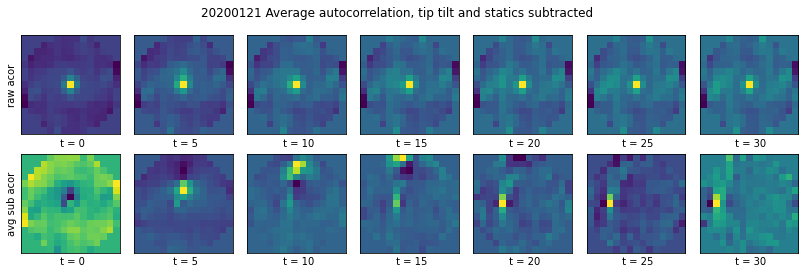

In [7]:
title= date.replace("/", "") +" Average autocorrelation, tip tilt and statics subtracted"
t_list = [0,5,10,15,20,25,30]
mat_cube_1 = d_stt_avg_r
mat_cube_2 = d_stt_avg
label_1, label_2 = "raw acor", "avg sub acor"

gc.graph_2_rows_t_mat(mat_cube_1, mat_cube_2,
                           t_list, title, 
                           label_1, label_2).savefig(out_p + "acor_graph_paper10.png")

# 3.2 CCOR Graph

In [12]:
med_sub = False
avg_sub = True
avg_len = 10

#data_s_tt.ccor_graph_all(t=0, avg_sub=avg_sub, avg_len=avg_len)
#data_s_tt.ccor_graph_all(t=10, avg_sub=avg_sub, avg_len=avg_len)
data_s_tt.ccor_graph_all(t=20, avg_sub=avg_sub, avg_len=avg_len)

'plots/20200121/plots/ccor_all_png/20200121_aocb0009o_stt_ccor_all_3.png'

In [8]:
# compare agianst a singular ccor
d_stt_24_x, d_stt_24_y = data_s_tt.data_get_cc(4,2, med_sub, avg_sub, avg_len)
d_stt_24_avg = (d_stt_24_x + d_stt_24_y)/2


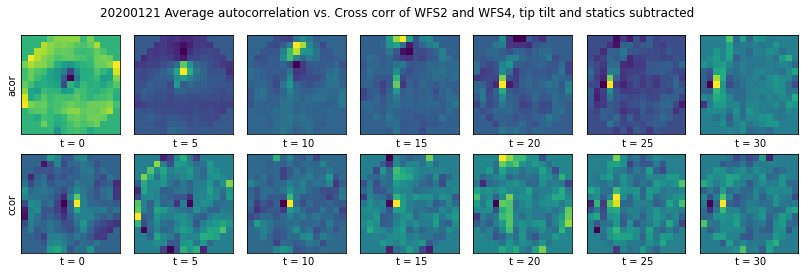

In [9]:
title= date.replace("/", "") +" Average autocorrelation vs. Cross corr of WFS2 and WFS4, tip tilt and statics subtracted"
t_list = [0,5,10,15,20,25,30]
mat_cube_1 = d_stt_avg
mat_cube_2 = d_stt_24_avg
label_1, label_2 = "acor", "ccor"

gc.graph_2_rows_t_mat(mat_cube_1, mat_cube_2,
                           t_list, title, 
                           label_1, label_2).savefig(out_p + "ccor_graph_paper24.png")

## Peak Morphology

In [ ]:
max_v = np.max(d_s_tt_sub_avg, axis = (1,2))
min_v = np.min(d_s_tt_sub_avg, axis = (1,2))
t_index = np.arange(len(max_v))
#max_index = np.argmax(avg_slopes, axis = (1,2))

plt.title(date + 'Max and min intensity over time')
plt.plot(t_index, max_v, label="max values")
plt.plot(t_index, min_v, label="min values")
plt.xticks = np.arange(max_v.shape[0])
plt.xlabel('time')
plt.ylabel('intensity')
plt.legend()
plt.show()